# Juego de la Vida (Game of Life)
El **Juego de la Vida**, también conocido como **Vida**, es un autómata celular diseñador por el matemático británico John Horton Conway en 1970. Es un juego sin jugadores, esto significa que su evolución está determinada por su estado inicial, sin requerir más entradas. Uno interactúa con el Juego de la Vida al crear un estado inicial (o configuración inicial) y se observa como evoluciona. Es Turing completo (puede simular cualquier máquina de Turing) y puede simular un constructor universal o cualquier otra máquina de Turing.
<center>
<img src="https://1.bp.blogspot.com/-pdQ2ckeQzCw/WwGFbYTKRoI/AAAAAAAAAY8/kb-gcutnkKc2TnQainAlYK5FlWmv87XywCPcBGAYYCw/s1600/ezgif.com-video-to-gif.gif" width=250 height=250 />
</center>

## Reglas

El universo (o entorno) del Juego de la Vida es infinito, cuadrícula ortogonal bidimensional de celdas cuadradas, cada una de ellas se encuentra con uno de dos posibles estados, vivo o muerto (o poblado o despoblado, respectivamente). Cada celda interactúa con ocho vecinos, que son las celdas adyacentes horizontales, verticales y diagonales. En cada paso de tiempo, las siguientes transiciones ocurren:

1. Cualquier celda viva con menos de dos vecinos vivos muere, debido a la poca población.
2. Cualquier celda viva con dos o tres vecinos vivos sobrevive para la siguiente generación.
3. Cualquier celda con más de tres vecinos vivos muere, debido a sobre población.
4. Cualquier celda muerta con exactamente tres vecinos vivos se convierte en una celda viva, debido a la reproducción.

Estas reglas, que comparan el comportamiento del autómata a la vida real, pueden ser condensadas en lo siguiente:

1. Cualquier celda viva con dos o más vecinos vivos sobrevive.
2. Cualquier celda muerta con tres vecinos vivos se convierte en una celda viva.
3. Cualquier otra celda viva muere en la siguiente generación. De manera similar, cualquier otra celda muerta se queda muerta.

El patrón inicial constituye la semilla del sistema. La primera generación es creada al aplicar las reglas anteriores de manera simultanea a cualquier celda en la semilla, viva o muerta; nacimientos y muertes ocurren simultáneamente, y el momento discreto en el cual esto pasa es a veces llamado turno. Cada generación es una función pura de la anterior. Las reglas se aplican de forma repetida para crear nuevas generaciones.

## Imports

Antes de empezar a crear el modelo del juego de la vida con multiagentes es necesario tener instalado los siguientes paquetes:
- `python`: asegúrense de usar la versión 3+.
- `mesa`: el framework de Python para el modelado de agentes.
- `numpy`: es una biblioteca de Python para el manejo de matrices, arreglos, manipulación matemática, lógica y mucho más.
- `matplotlib`: es una biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python.

Para poder modelar el juego de la vida usando el framework de `mesa` es necesario importar dos clases: una para el modelo general, y otro para los agentes.

In [1]:
!pip install mesa seaborn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 960.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.7/425.7 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 

In [2]:
# Importamos las clases que se requieren para manejar los agentes (Agent) y su entorno (Model).
# Cada modelo puede contener múltiples agentes.
from mesa import Agent, Model

# Debido a que necesitamos que existe un solo agente por celda, elegimos ''SingleGrid''.
from mesa.space import SingleGrid

# Con ''SimultaneousActivation, hacemos que todos los agentes se activen ''al mismo tiempo''.
from mesa.time import SimultaneousActivation

# Haremos uso de ''DataCollector'' para obtener información de cada paso de la simulación.
from mesa.datacollection import DataCollector

# matplotlib lo usaremos crear una animación de cada uno de los pasos del modelo.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

# Importamos los siguientes paquetes para el mejor manejo de valores numéricos.
import numpy as np
import pandas as pd

# Definimos otros paquetes que vamos a usar para medir el tiempo de ejecución de nuestro algoritmo.
import time
import datetime

In [3]:
# Clase GameOfLifeAgent que hereda de la clase Agent, representando un agente en el Juego de la Vida
class GameOfLifeAgent(Agent):
  # Método inicializador para establecer propiedades del agente
  def __init__(self, id, model):
    # Llama al inicializador de la clase base (Agent) para configurar el id y el modelo
    super().__init__(id, model)
    # Estado actual del agente, donde 0 representa "muerto" y 1 representa "vivo"
    self.live = self.random.choice([0, 1])
    # Atributo que almacenará el estado del agente en el siguiente paso
    self.next = None

  # Método que define el comportamiento del agente en cada paso de la simulación
  def step(self):
    # Obtiene una lista de agentes vecinos en el grid (rejilla), usando el vecindario de Moore
    # (8 vecinos alrededor) sin incluirse a sí mismo en la lista
    neighbors = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)
    # Inicializa el contador de vecinos vivos en 0
    count = 0
    # Itera sobre cada agente vecino y suma su estado "vivo" (1) al contador
    for agent in neighbors:
      count += agent.live
    # Define el estado del agente en el siguiente paso, comenzando con el estado actual
    self.next = self.live
    # Regla para el agente vivo: muere si tiene menos de 2 o más de 3 vecinos vivos
    if self.live == 1:
      if count < 2 or count > 3:
        self.next = 0
    # Regla para el agente muerto: revive si tiene exactamente 3 vecinos vivos
    else:
      if count == 3:
        self.next = 1

  # Método en la clase GameOfLifeAgent que actualiza el estado del agente
  def advance(self):
    # Asigna el estado calculado en el paso anterior (self.next) al estado actual (self.live)
    self.live = self.next

In [9]:
# Función que devuelve una representación de la rejilla en forma de matriz numpy,
# donde cada posición indica si hay un agente vivo o muerto
def get_grid(model):
  # Crea una matriz de ceros con las dimensiones de la rejilla del modelo.
  # Cada posición en la matriz representará una celda en la rejilla (0 para muerto, 1 para vivo)
  grid = np.zeros((model.grid.width, model.grid.height))
  # Itera sobre cada agente en la rejilla junto con sus coordenadas (x, y)
  for agent, (x, y) in model.grid.coord_iter():
    # Si el agente en la posición (x, y) está vivo (live == 1),
    # coloca un 1 en la matriz en la posición correspondiente
    if agent.live == 1:
      grid[x][y] = 1
  # Devuelve la matriz de la rejilla actualizada con el estado de cada celda
  return grid

In [10]:
# Clase principal del modelo del Juego de la Vida, que hereda de Model y configura la simulación
class GameOfLifeModel(Model):
  # Inicializador del modelo, que recibe el ancho y alto de la rejilla como parámetros
  def __init__(self, width, height):
    # Llama al inicializador de la clase base para configurar el modelo
    super().__init__()
    # Configura la rejilla con el tamaño especificado, utilizando el argumento torus=True
    # para que los bordes estén conectados, simulando una rejilla infinita (bordes envolventes)
    self.grid = SingleGrid(width, height, torus=True)
    # Inicializa el programador (scheduler) que permite activar los agentes al mismo tiempo
    self.schedule = SimultaneousActivation(self)
    # Configura un recolector de datos para recolectar información del modelo,
    # en este caso, captura el estado de la rejilla en cada paso
    self.datacollector = DataCollector(
        model_reporters={"Grid": get_grid}  # get_grid debe ser una función que recoge el estado de la rejilla
    )

    # Itera sobre cada posición (x, y) en la rejilla del modelo para crear y colocar un agente en cada celda
    for _, (x, y) in self.grid.coord_iter():
      # Crea un nuevo agente GameOfLifeAgent, con coordenadas (x, y) y lo asocia a este modelo
      agent = GameOfLifeAgent((x, y), self)
      # Coloca el agente en la posición (x, y) en la rejilla
      self.grid.place_agent(agent, (x, y))
      # Añade el agente al scheduler para que se incluya en los ciclos de simulación
      self.schedule.add(agent)

  # Método step de la clase GameOfLifeModel, que representa un paso en la simulación
  def step(self):
    # Recolecta datos del estado actual del modelo, como el estado de la rejilla, usando el datacollector
    self.datacollector.collect(self)
    # Ejecuta un paso en el scheduler, que hace que cada agente en la rejilla realice su acción (step) en paralelo
    self.schedule.step()

In [11]:
# Constantes para definir el número de generaciones y el tamaño de la rejilla
GENERATIONS = 2000  # Número total de generaciones o pasos a simular
N = 20  # Tamaño de la rejilla N x N
# Crea una instancia del modelo del Juego de la Vida con una rejilla de tamaño N x N
model = GameOfLifeModel(N, N)

# Bucle para ejecutar la simulación durante el número de generaciones especificado
for i in range(GENERATIONS):
    # Ejecuta un paso en el modelo, actualizando el estado de los agentes y recolectando datos
    model.step()

In [12]:
# Obtiene todos los datos recolectados del modelo a través del datacollector.
# `get_model_vars_dataframe()` devuelve un DataFrame de pandas, donde cada fila
# representa el estado de la rejilla en un paso específico de la simulación.
all_grids = model.datacollector.get_model_vars_dataframe()

# Muestra las primeras 5 filas del DataFrame para visualizar los datos iniciales recolectados.
# Esto ayuda a revisar el estado de la rejilla en los primeros pasos de la simulación.
all_grids.head(5)

Grid
0  [[1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0,...
1  [[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2  [[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3  [[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0,...
4  [[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0,...

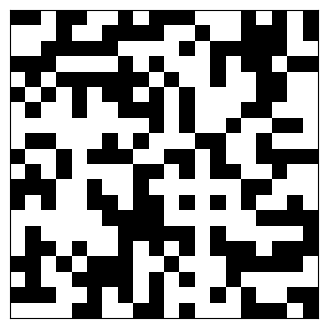

In [18]:
fig, axis = plt.subplots(figsize = (4, 4))
axis.set_xticks([])
axis.set_yticks([])
patch = plt.imshow(all_grids.iloc[0,0], cmap=plt.cm.binary)

def animate(i):
  patch.set_data(all_grids.iloc[i,0])

anim = animation.FuncAnimation(fig, animate, frames=GENERATIONS)

In [19]:
anim